In [42]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [43]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [44]:
# Read the data from csv file

Boombikes = pd.read_csv('C:/Users/Dell/Desktop/day.csv')

In [45]:
# Check the head of the dataset
 
Boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [46]:
# checking the shape of dataframe

Boombikes.shape

(730, 16)

In [47]:
# describing the columns of dataframe

Boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [48]:
# get the info about columns

Boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [49]:
# checking for the null values in column data

Boombikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No Null Values in the Dataset

In [50]:
# checking for the Duplicate values in the Dataset

len(Boombikes[Boombikes.duplicated()])

0

No Duplicate Values available in the Dataset

In [51]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

Boombikes.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [52]:
# Encoding/mapping the season column

Boombikes.season = Boombikes.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [53]:
# Encoding/mapping the month column

Boombikes.mnth = Boombikes.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [55]:
# Encoding/mapping the weekday column

Boombikes.weekday = Boombikes.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [56]:
# Encoding/mapping the weathersit column

Boombikes.weathersit = Boombikes.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [57]:
# check the head of the dataset after encoding/mapping

Boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,NaN,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,NaN,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,NaN,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,NaN,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,NaN,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [58]:
# renaming few columns for better readibility

Boombikes.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [59]:
# check the head of the dataset after columns head renaming

Boombikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,Spring,0,Jan,0,NaN,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,NaN,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,NaN,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,NaN,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,NaN,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [60]:
# Encoding/mapping the year column

Boombikes.year = Boombikes.year.map({0:2018, 1:2019})

In [61]:
# check the head of the dataset after encoding the year column

Boombikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,Spring,2018,Jan,0,NaN,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,0,NaN,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,Jan,0,NaN,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,Jan,0,NaN,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,Jan,0,NaN,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [62]:
# check the column info of the dataset

Boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     0 non-null      object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Exploratory Data Analysis  

Univariate Analysis & Bivariate Analysis

ValueError: min() arg is an empty sequence

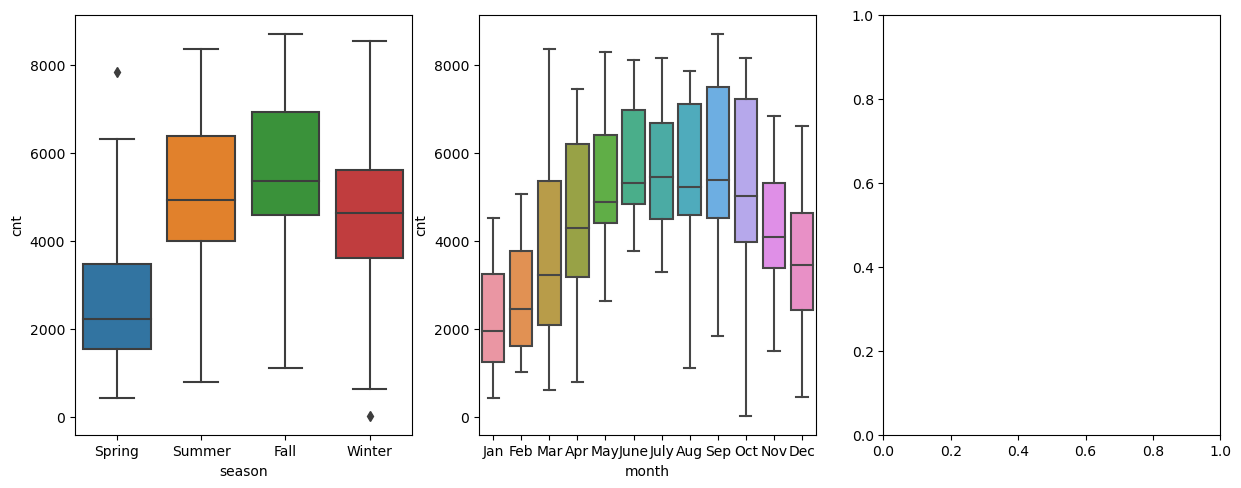

In [63]:
# Analysing/visualizing the categorical columns
# to see how a single predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = Boombikes)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = Boombikes)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = Boombikes)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Boombikes)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = Boombikes)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Boombikes)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = Boombikes)
plt.show()

Observations from the Box Plots:
Seasons: Majoririty of the Bikes are shared during summer and fall
Months: Majority of the Bikes are shared between June and October
Weekdays: IQR is more on Wednesday and Saturday
Weathersit: Bikes are more used in Clear Weather
Holiday: IQR is more on Holidays but Median is more on no-holiday
WorkingDay: Median is almost same on workingday and Weekend/holiday
Year: IQR and Median both are more in 2019

In [40]:
# Analysis using barplots related to categorical columns
def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=Boombikes)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=Boombikes, hue='year',palette='Set1')
    plt.legend(hue)
    plt.show()

TypeError: barplot() got multiple values for argument 'data'

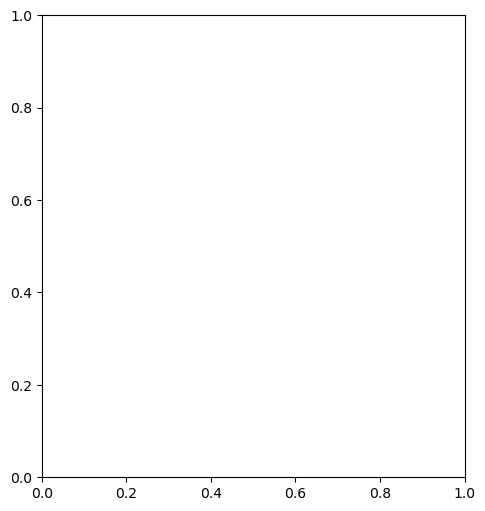

In [41]:
 plot_cat_columns('season')

The demand for bikes seems to be more in the Fall Season
The demand for bikes has increased in 2019 compared to 2018 for every season  

In [27]:
# Analysis using barplots related to categorical columns
def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=Boombikes)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=Boombikes, hue='year',palette='Set1')
    plt.legend(hue)
    plt.show()

NameError: name 'hue' is not defined

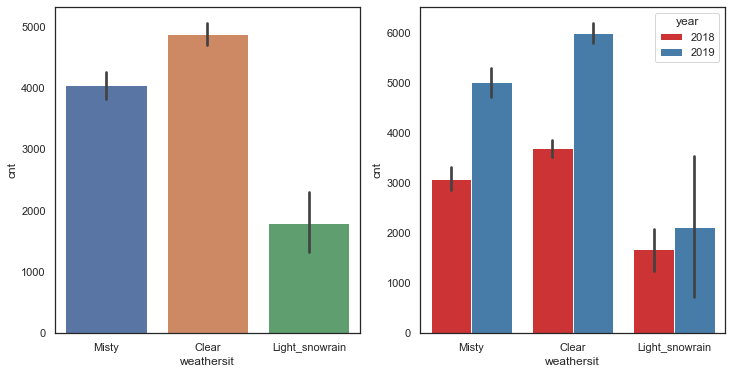

In [123]:
 plot_cat_columns('weathersit')

The Demand for the bikes more in Clear Weather situation
The demand for bikes is lower during Light Snowrain in both 2018 and 2019

TypeError: barplot() got multiple values for argument 'data'

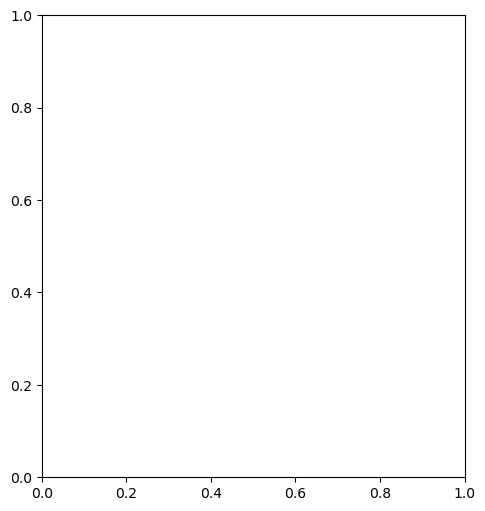

In [36]:
# plotting visualization for month column

plot_cat_columns('month')

Observations from the Bar Plots:
The demand for bikes has increased from January to June and has remained relatively constant till September 
and then later declined from September to December in both the years
Most of the bookings has been done during the month of may, june, july, aug, sep and oct.
Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year. 
Number of booking for each month seems to have increased from 2018 to 2019.

TypeError: barplot() got multiple values for argument 'data'

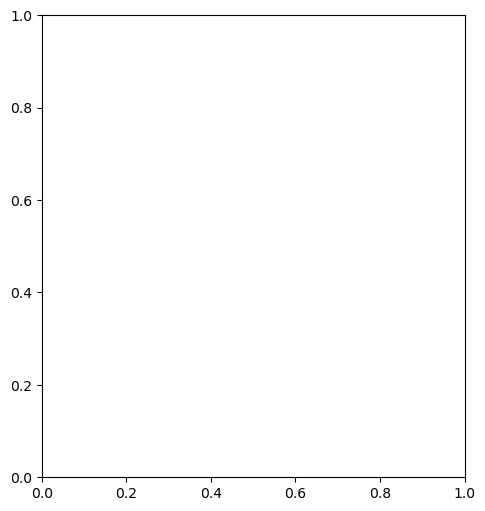

In [29]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

The demand for bikes is almost constant throught the year 2018 but have increased in 2019 on a daily basis

TypeError: barplot() got multiple values for argument 'data'

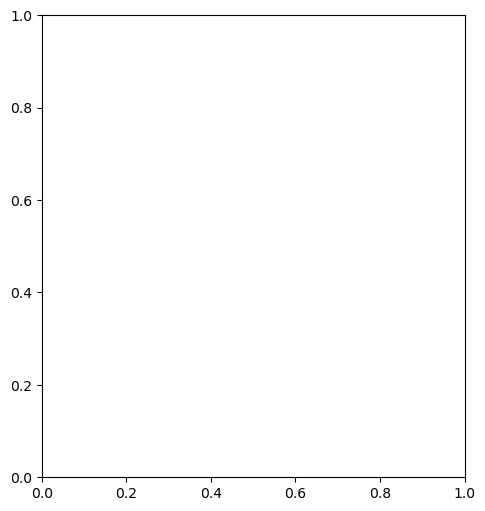

In [30]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

The demand for the Bikes is lower on holidays.
May be the higher demand on non-holidays is to due to the fact that the bike is used for commuting to work daily.

TypeError: barplot() got multiple values for argument 'data'

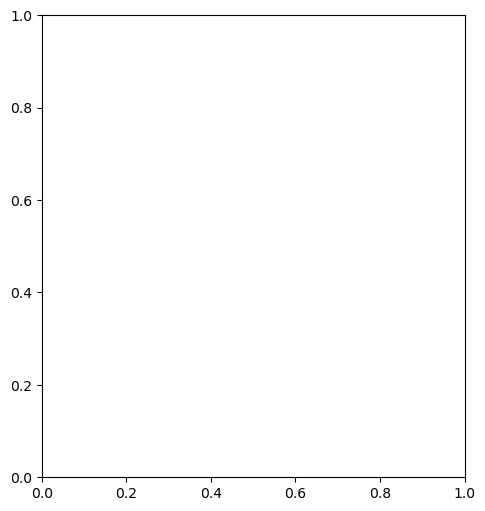

In [31]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

The demand for the Bikes is more on workingdays also supports the point that the bikes are used for commuting to work

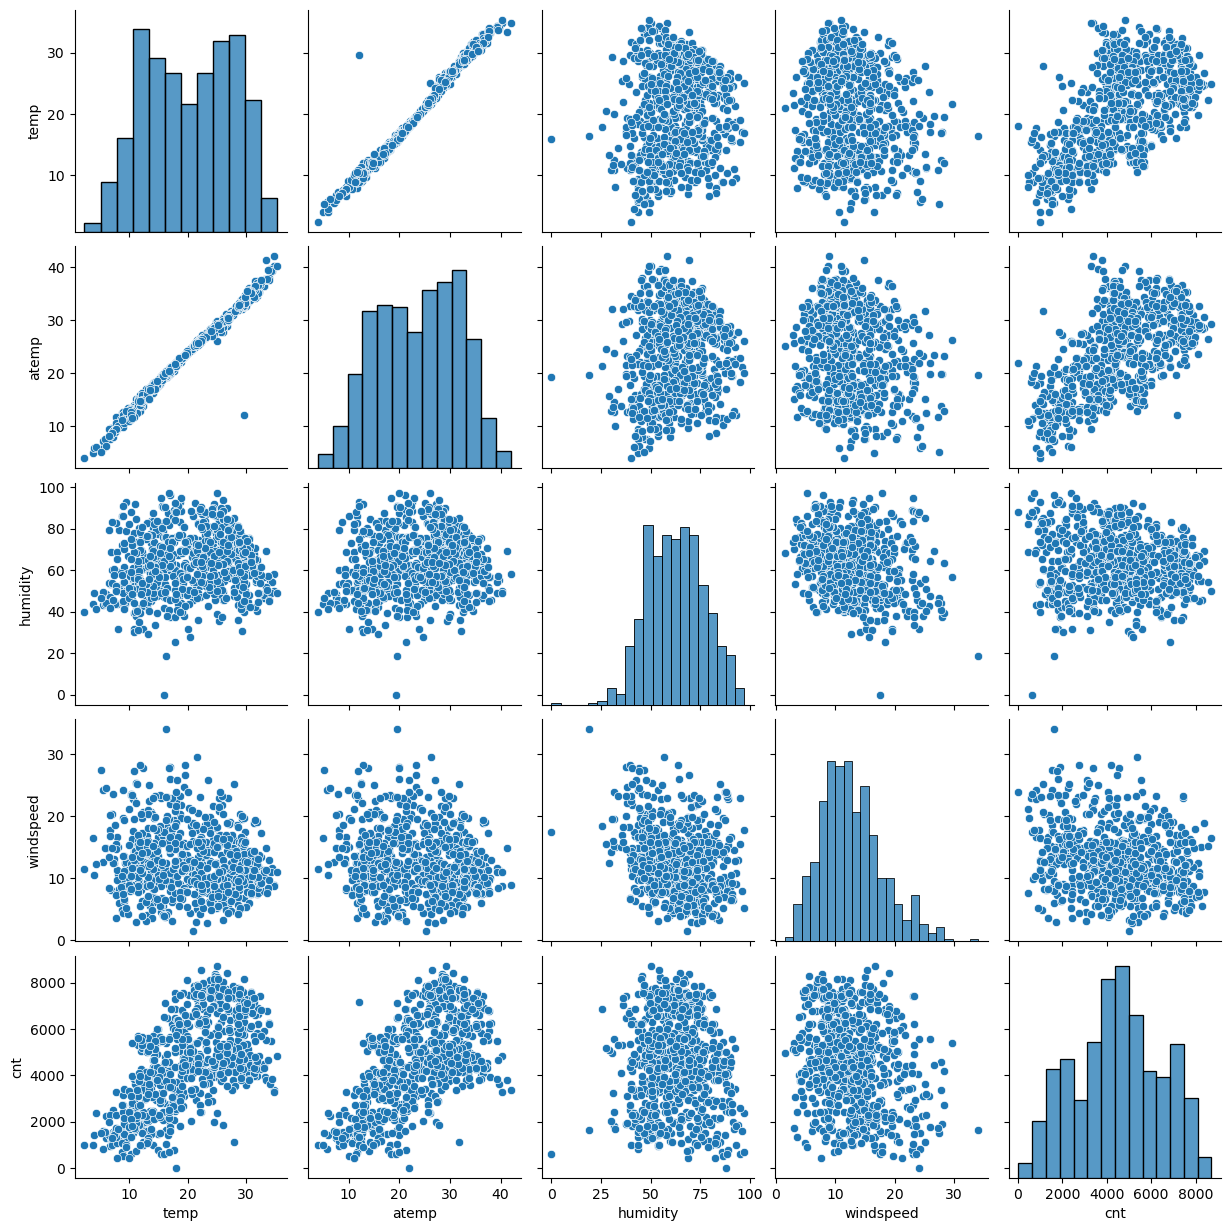

In [33]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=Boombikes,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

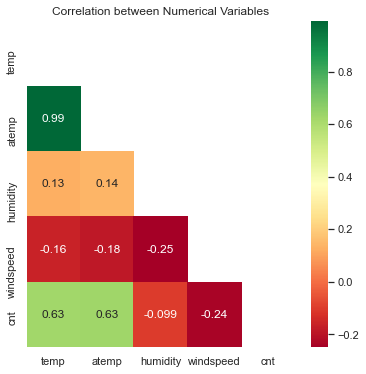

In [142]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(Boombikes[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(Boombikes[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

# Data Preparation

In [147]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_Boombikes=pd.get_dummies(Boombikes.month,drop_first=True)
weekdays_Boombikes=pd.get_dummies(Boombikes.weekday,drop_first=True)
weathersit_Boombikes=pd.get_dummies(Boombikes.weathersit,drop_first=True)
seasons_Boombikes=pd.get_dummies(Boombikes.season,drop_first=True)

In [185]:
# Encoding/mapping the year column

Boombikes.year = Boombikes.year.map({2018:0, 2019:1})

In [186]:
Boombikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [187]:
# Merging  the dataframe, with the dummy variable dataset. 

Boombikes_new = pd.concat([Boombikes,months_Boombikes,weekdays_Boombikes,weathersit_Boombikes,seasons_Boombikes],axis=1)

In [188]:
Boombikes_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
0,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [189]:
Boombikes_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  Aug             730 non-null    uint8  
 13  Dec             730 non-null    uint8  
 14  Feb             730 non-null    uint8  
 15  Jan             730 non-null    uint8  
 16  July            730 non-null    uint8  
 17  June            730 non-null    uin

In [190]:
# dropping unwanted columns as we have already created dummy variable out of it.

Boombikes_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [191]:
Boombikes_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [192]:
# check the shape of new dataframe

Boombikes_new.shape

(730, 30)

In [193]:
# check the column info of new dataframe 

Boombikes_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   Aug             730 non-null    uint8  
 9   Dec             730 non-null    uint8  
 10  Feb             730 non-null    uint8  
 11  Jan             730 non-null    uint8  
 12  July            730 non-null    uint8  
 13  June            730 non-null    uint8  
 14  Mar             730 non-null    uint8  
 15  May             730 non-null    uint8  
 16  Nov             730 non-null    uint8  
 17  Oct             730 non-null    uin

## Training and Testing Sets

In [194]:
# splitting the dataframe into Train and Test

np.random.seed(0)
Boombikes_train, Boombikes_test = train_test_split(Boombikes_new, train_size = 0.8, random_state = 100)

In [195]:
# check the shape of training datatset

Boombikes_train.shape

(584, 30)

In [196]:
# check the shape of testing datatset

Boombikes_test.shape

(146, 30)

In [197]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [198]:
# verifying the head of dataset before scaling.

Boombikes_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
367,1,0,1,6.150000,6.31375,44.1250,24.499957,2236,0,0,...,0,0,0,1,0,0,0,1,0,0
648,1,0,1,17.835000,21.55835,46.3333,12.166932,7570,0,0,...,0,0,1,0,0,0,0,0,0,1
44,0,0,1,17.015000,19.91750,37.5833,27.999836,1913,0,0,...,0,0,0,0,0,0,0,1,0,0
705,1,0,1,13.154153,16.09790,76.4167,8.750200,5008,0,1,...,0,0,0,0,0,0,1,0,0,1
379,1,0,0,6.833347,8.08125,41.9167,16.834286,2311,0,0,...,0,1,0,0,0,0,0,1,0,0


In [199]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
Boombikes_train[num_vars] = scaler.fit_transform(Boombikes_train[num_vars])

In [200]:
# verifying the head after appying scaling.

Boombikes_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
367,1,0,1,0.113228,0.061963,0.454701,0.695175,0.254717,0,0,...,0,0,0,1,0,0,0,1,0,0
648,1,0,1,0.468352,0.462175,0.477458,0.299450,0.868385,0,0,...,0,0,1,0,0,0,0,0,0,1
44,0,0,1,0.443431,0.419099,0.387290,0.807474,0.217556,0,0,...,0,0,0,0,0,0,0,1,0,0
705,1,0,1,0.326094,0.318824,0.787463,0.189819,0.573631,0,1,...,0,0,0,0,0,0,1,0,0,1
379,1,0,0,0.133996,0.108365,0.431945,0.449210,0.263346,0,0,...,0,1,0,0,0,0,0,1,0,0


In [201]:
# describing the dataset

Boombikes_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.667808,0.537414,0.513175,0.649499,0.319463,0.515792,0.090753,0.087329,...,0.150685,0.154110,0.135274,0.133562,0.154110,0.027397,0.342466,0.251712,0.246575,0.250000
std,0.500241,0.163378,0.471403,0.225336,0.211663,0.144219,0.168114,0.225336,0.287504,0.282558,...,0.358048,0.361363,0.342309,0.340472,0.361363,0.163378,0.474941,0.434369,0.431387,0.433384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.331819,0.535852,0.199177,0.350696,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545191,0.530558,0.653714,0.294764,0.522837,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736512,0.690521,0.752361,0.410413,0.691872,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


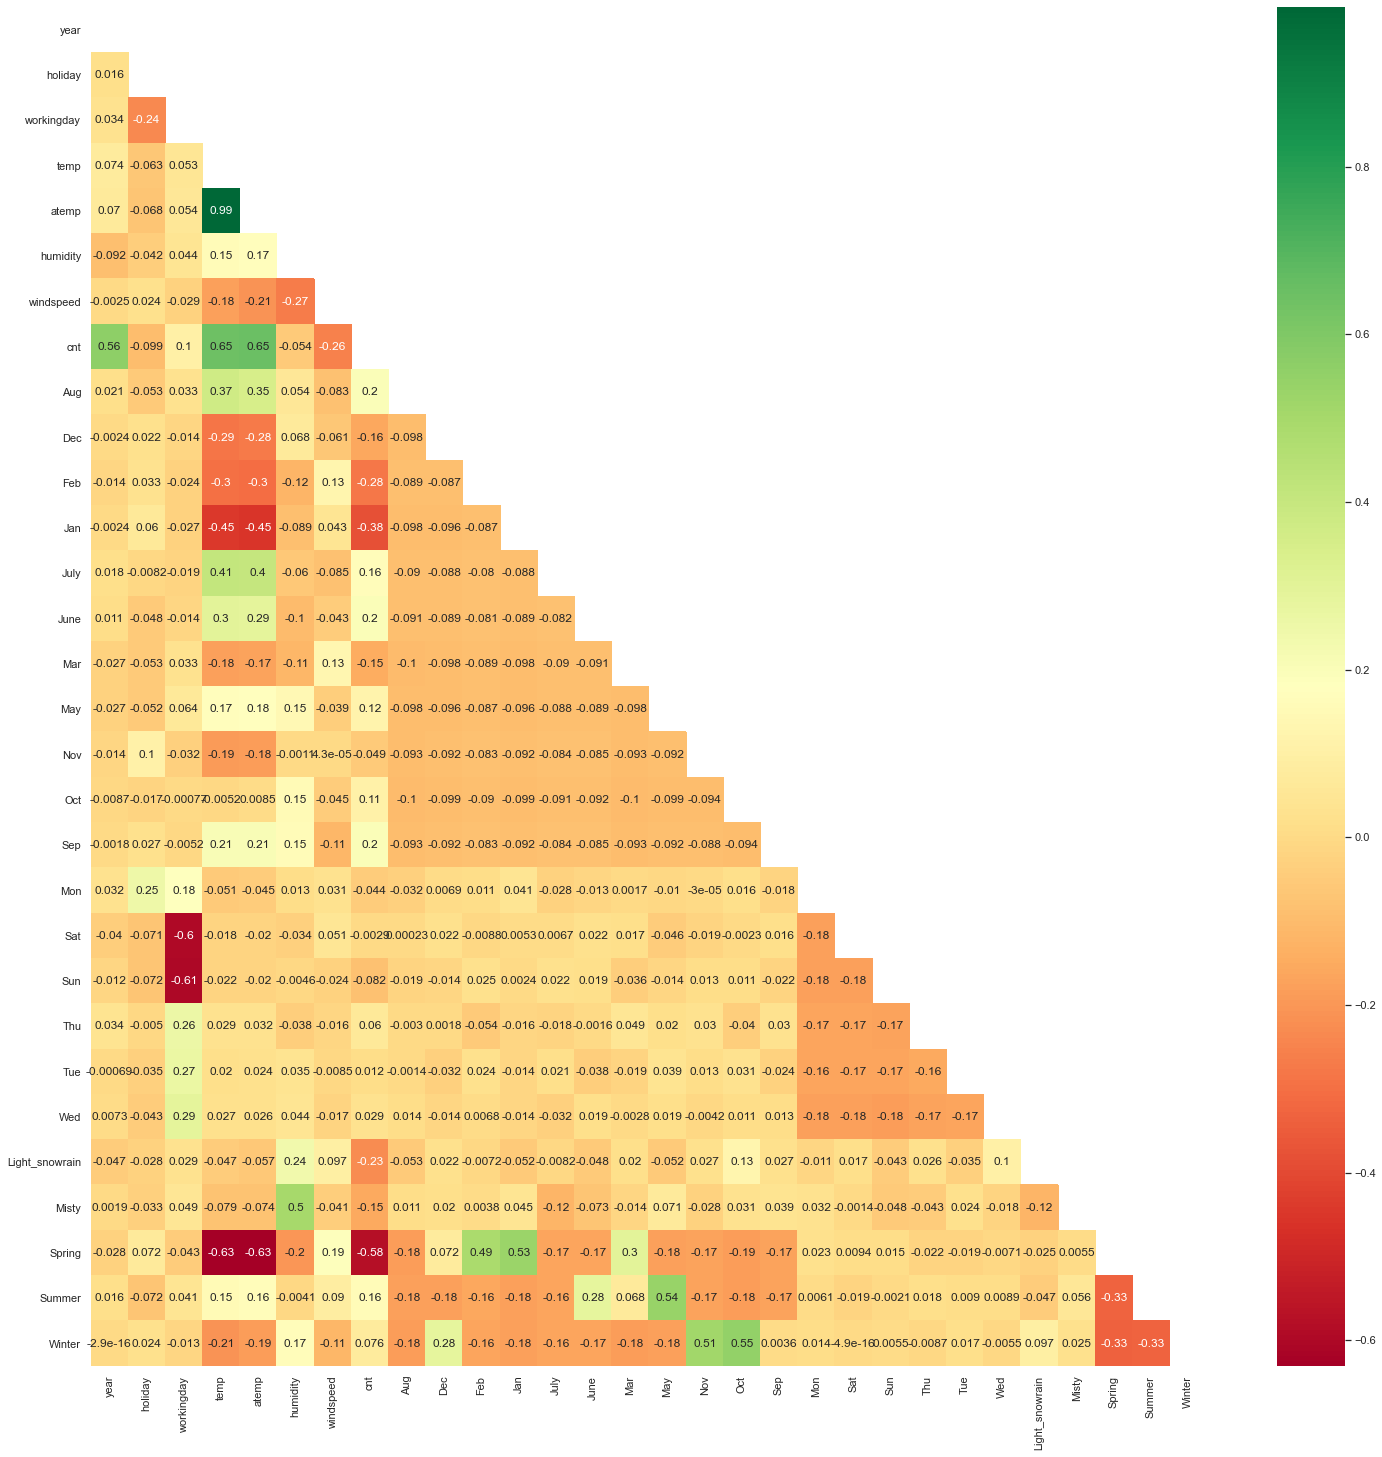

In [202]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(Boombikes_train.corr())
sns.heatmap(Boombikes_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

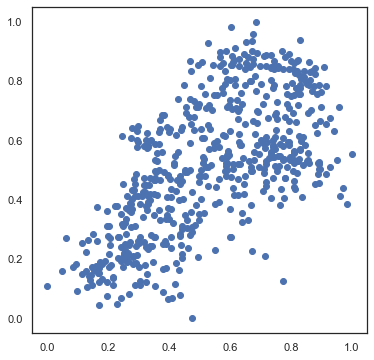

In [203]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(Boombikes_train.temp, Boombikes_train.cnt)
plt.show()

Visualization confirms the positive correlation between temp and cnt

In [204]:
# Building the Linear Model

y_train = Boombikes_train.pop('cnt')
X_train = Boombikes_train

In [206]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [207]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 6),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('Mar', False, 15),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', False, 2),
 ('Mon', False, 7),
 ('Sat', True, 1),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 8),
 ('Wed', False, 14),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 3),
 ('Winter', True, 1)]

In [208]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'Dec',
       'Jan', 'July', 'Nov', 'Sat', 'Light_snowrain', 'Misty', 'Spring',
       'Winter'],
      dtype='object')


In [209]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Sep', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed', 'Summer'],
      dtype='object')

In [211]:
# Generic function to calculate VIF of variables

def calculateVIF(Boombikes):
    vif = pd.DataFrame()
    vif['Features'] = Boombikes.columns
    vif['VIF'] = [variance_inflation_factor(Boombikes.values, i) for i in range(Boombikes.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [212]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [213]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
4,humidity,25.87
3,temp,18.12
2,workingday,5.01
5,windspeed,4.25
13,Spring,3.06
14,Winter,2.77
12,Misty,2.29
0,year,2.08
10,Sat,1.90
7,Jan,1.71


humidity shows high VIF value

# Building a linear model

In [214]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     216.6
Date:                Sat, 05 Aug 2023   Prob (F-statistic):          2.02e-223
Time:                        18:53:27   Log-Likelihood:                 598.33
No. Observations:                 584   AIC:                            -1165.
Df Residuals:                     568   BIC:                            -1095.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3155      0.031     10.

In [215]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,6.55
2,workingday,4.89
4,windspeed,4.25
12,Spring,2.48
13,Winter,2.40
0,year,2.07
9,Sat,1.88
8,Nov,1.68
6,Jan,1.63
11,Misty,1.55


VIF values seems to be good now. But we will see if we can reduce further ?

In [216]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     226.1
Date:                Sat, 05 Aug 2023   Prob (F-statistic):          1.00e-221
Time:                        19:47:09   Log-Likelihood:                 591.49
No. Observations:                 584   AIC:                            -1153.
Df Residuals:                     569   BIC:                            -1087.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2460      0.025      9.

In [222]:
# We can drop holiday variable as it has high p-value
X_train_new = X_train_new.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.22
1,workingday,4.34
3,windspeed,4.23
11,Spring,2.44
12,Winter,2.40
0,year,2.07
8,Sat,1.76
7,Nov,1.65
5,Jan,1.62
10,Misty,1.55


VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

In [223]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     242.4
Date:                Sat, 05 Aug 2023   Prob (F-statistic):          2.72e-222
Time:                        20:10:08   Log-Likelihood:                 589.98
No. Observations:                 584   AIC:                            -1152.
Df Residuals:                     570   BIC:                            -1091.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2423      0.025      9.

In [227]:
# We can drop Jan variable as it is the only variable with high p-value
X_train_new = X_train_new.drop(['Jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

KeyError: "['Jan'] not found in axis"

In [228]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sat, 05 Aug 2023   Prob (F-statistic):          4.59e-221
Time:                        20:18:56   Log-Likelihood:                 584.20
No. Observations:                 584   AIC:                            -1142.
Df Residuals:                     571   BIC:                            -1086.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2205      0.024      9.

In [229]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.11
1,workingday,4.31
3,windspeed,4.23
11,Winter,2.38
0,year,2.06
10,Spring,1.88
7,Sat,1.75
6,Nov,1.65
9,Misty,1.54
4,Dec,1.37


In [231]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sat, 05 Aug 2023   Prob (F-statistic):          4.59e-221
Time:                        20:20:11   Log-Likelihood:                 584.20
No. Observations:                 584   AIC:                            -1142.
Df Residuals:                     571   BIC:                            -1086.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2205      0.024      9.

We can cosider the above model i.e lr_5, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
F-Statistics value of 257 (which is greater than 1) and the p-value of 4.59e-221 i.e almost equals to zero, states that the overall model is significant

In [232]:
# Checking the parameters and their coefficient values
lr_5.params

const             0.220459
year              0.231480
workingday        0.058810
temp              0.444813
windspeed        -0.152284
Dec              -0.054460
July             -0.076532
Nov              -0.065502
Sat               0.070121
Light_snowrain   -0.296441
Misty            -0.081126
Spring           -0.124191
Winter            0.076563
dtype: float64

Residual Analysis of the train data and validation

In [233]:
X_train_lm_5

,const,year,workingday,temp,windspeed,Dec,July,Nov,Sat,Light_snowrain,Misty,Spring,Winter
367,1.0,1,1,0.113228,0.695175,0,0,0,0,0,0,1,0
648,1.0,1,1,0.468352,0.299450,0,0,0,0,0,0,0,1
44,1.0,0,1,0.443431,0.807474,0,0,0,0,0,0,1,0
705,1.0,1,1,0.326094,0.189819,1,0,0,0,0,1,0,1
379,1.0,1,0,0.133996,0.449210,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0,0,0,0
53,1.0,0,1,0.202618,0.111379,0,0,0,0,0,0,1,0
350,1.0,0,0,0.248216,0.431816,1,0,0,1,0,1,0,1
79,1.0,0,1,0.462664,0.529881,0,0,0,0,0,1,0,0


In [234]:
y_train_pred = lr_5.predict(X_train_lm_5)

Normality of error terms

Text(0.5, 0, 'Errors')

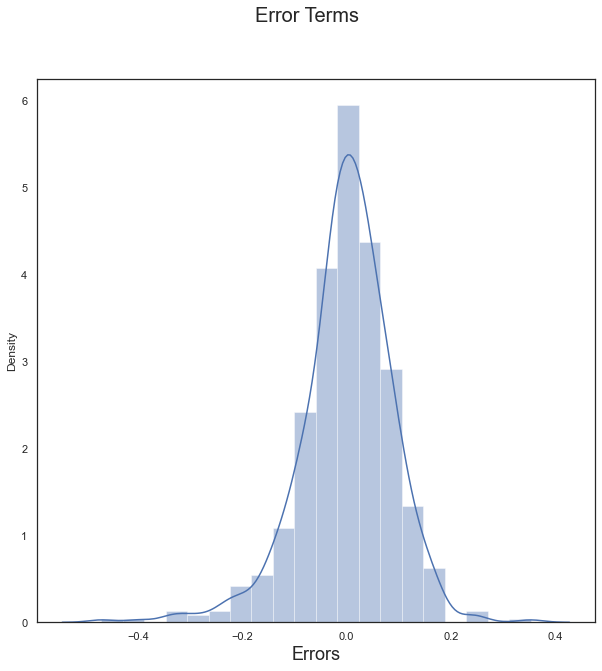

In [235]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

# Multi Colinearity

In [236]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.11
1,workingday,4.31
3,windspeed,4.23
11,Winter,2.38
0,year,2.06
10,Spring,1.88
7,Sat,1.75
6,Nov,1.65
9,Misty,1.54
4,Dec,1.37


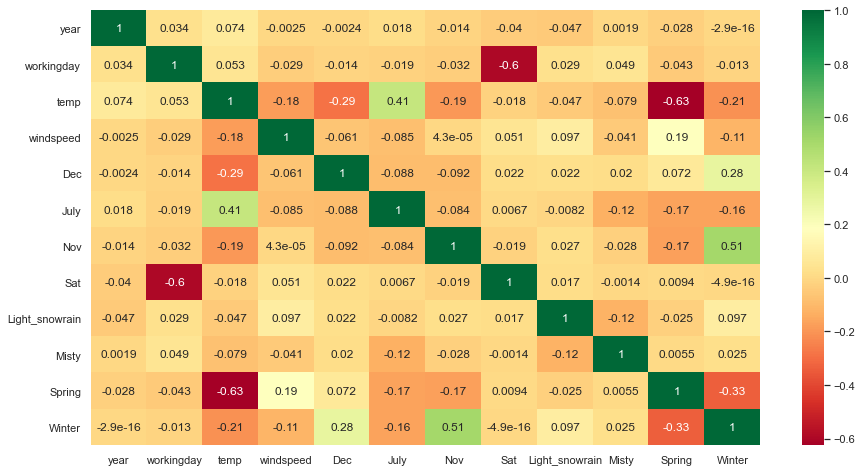

In [237]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

there is no multicolinearity as seen from the heatmap

# Linearity

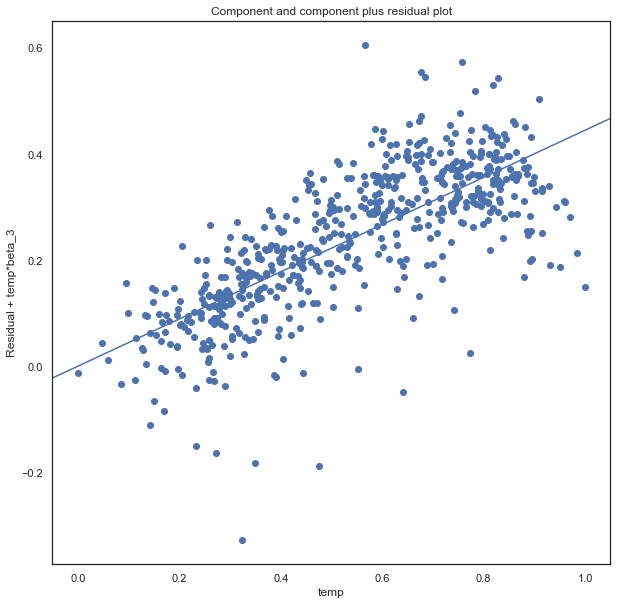

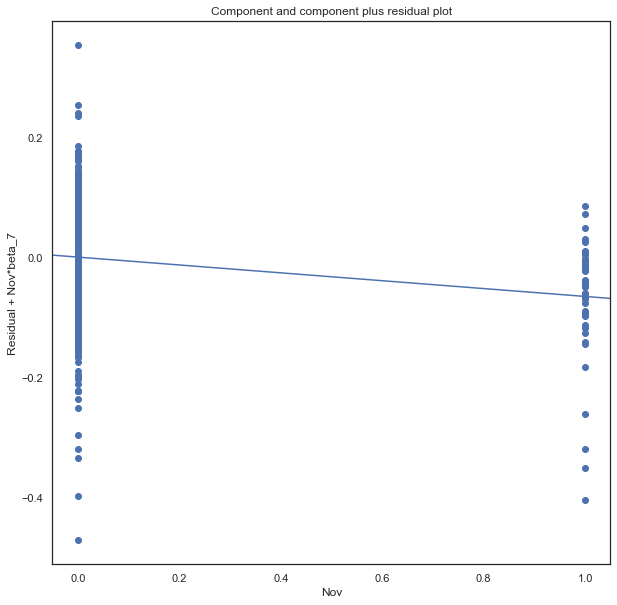

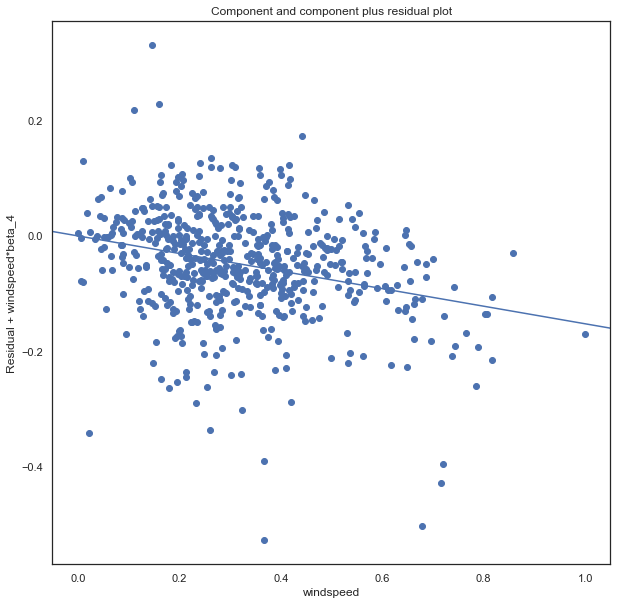

In [238]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_5, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'Nov')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'windspeed')
plt.show()

Linearity can be observed from above visualizations.

# Homoscedasticity

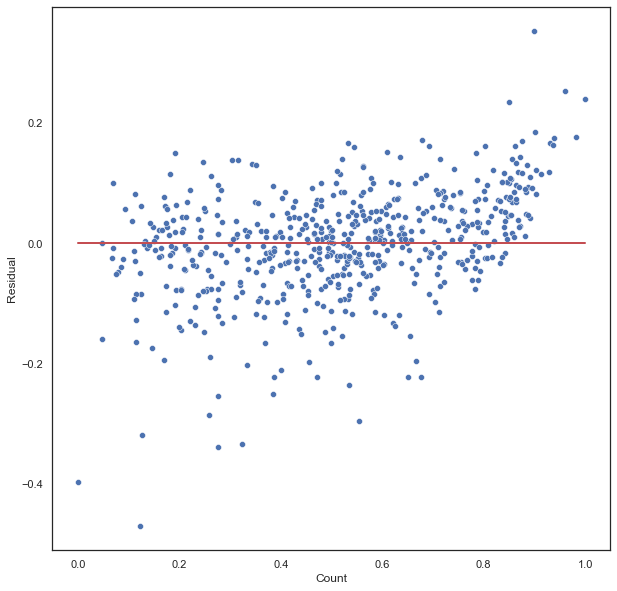

In [239]:
y_train_pred = lr_5.predict(X_train_lm_5)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

Independence of residuals
Durbin-Watson value of final model lr_5 is 1.075, which signifies there is no autocorrelation.

# Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 5th model.

In [243]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
Boombikes_test[num_vars] = scaler.transform(Boombikes_test[num_vars])
Boombikes_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [244]:
Boombikes_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.445205,0.034247,0.746575,0.569603,0.542752,0.635933,0.315127,0.517368,0.061644,0.075342,...,0.116438,0.102740,0.171233,0.178082,0.089041,0.034247,0.315068,0.226027,0.273973,0.219178
std,0.498699,0.182488,0.436469,0.238088,0.222120,0.156357,0.161524,0.212757,0.241335,0.264852,...,0.321854,0.304664,0.378009,0.383899,0.285783,0.182488,0.466142,0.419697,0.447530,0.415114
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.250000,0.359075,0.346732,0.534457,0.196160,0.391251,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.560248,0.544652,0.614856,0.306383,0.508916,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.801929,0.743337,0.730570,0.411976,0.649994,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.800793,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [245]:
y_test = Boombikes_test.pop('cnt')
X_test = Boombikes_test

In [247]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [248]:
y_pred = lr_5.predict(X_test_lm_5)

In [249]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7787

Model Evaluation

Text(0, 0.5, 'y_pred')

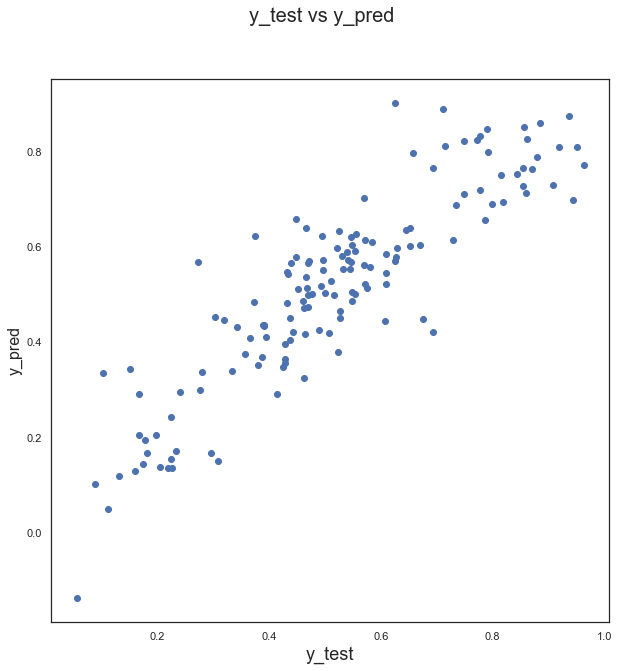

In [250]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [251]:
round(lr_5.params,4)

const             0.2205
year              0.2315
workingday        0.0588
temp              0.4448
windspeed        -0.1523
Dec              -0.0545
July             -0.0765
Nov              -0.0655
Sat               0.0701
Light_snowrain   -0.2964
Misty            -0.0811
Spring           -0.1242
Winter            0.0766
dtype: float64

Best Fit Line
Cnt = 0.2205 + (0.2315 x year) + (0.0588 x workingday) + (0.4448 x temp) - (0.1523 x windspeed) - (0.0545 x Dec) - (0.0765 x July) - (0.0655 x Nov) + (0.0701 x Sat) - (0.2964 x Light_snowrain) - (0.0811 x Misty) - (0.1242 x Spring) + (0.0766 x Winter)

In [252]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7588


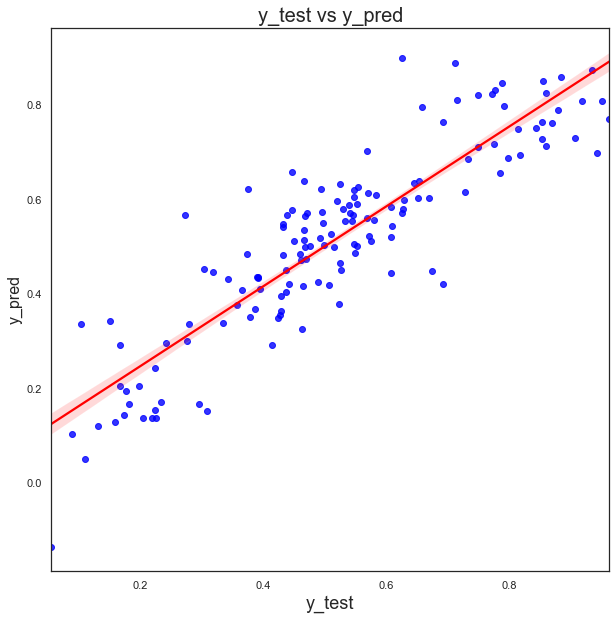

In [253]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.844
- Test dataset R^2           : 0.7787
- Train dataset Adjusted R^2 : 0.841    
- Test dataset Adjusted R^2  : 0.7588

Demand of bikes depend on year, workingday, temp, windspeed, Dec, July, Nov, Sat, Light_snowrain, Misty, Spring and Winter.